# Lab 03 - FIS

Author: Gary Marigliano, based on the work of Hector Satizabal

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* Please keep this structure when you will do the exercises.


**TODO student** Read and explore the code provided both in this folder.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.rules.fuzzy_rule import FuzzyRule, Antecedent, Consequent
from fuzzy_systems.core.fis.fis import FIS, OR_max, AND_min, MIN, COA_func

from fuzzy_systems.view.fis_viewer import FISViewer
from fuzzy_systems.view.fis_surface import show_surface

## Introduction

Now that we have see the main parts of a FIS, we can build a complete example.

The "Tip problem" consists of evaluating the tip (let's say in dollars) you should give to a restaurant after your order. There are two input variables, the **food quality** and the **service quality**. Both are in [0, 10] and split in 3 categories poor, average and high. The output variable is the **tip** in [0, 25] also split in 3 categories low, medium and high.

Let's see how to build this example using the fuzzy system library.

predicted_value {'tip': 11.542353595409892}


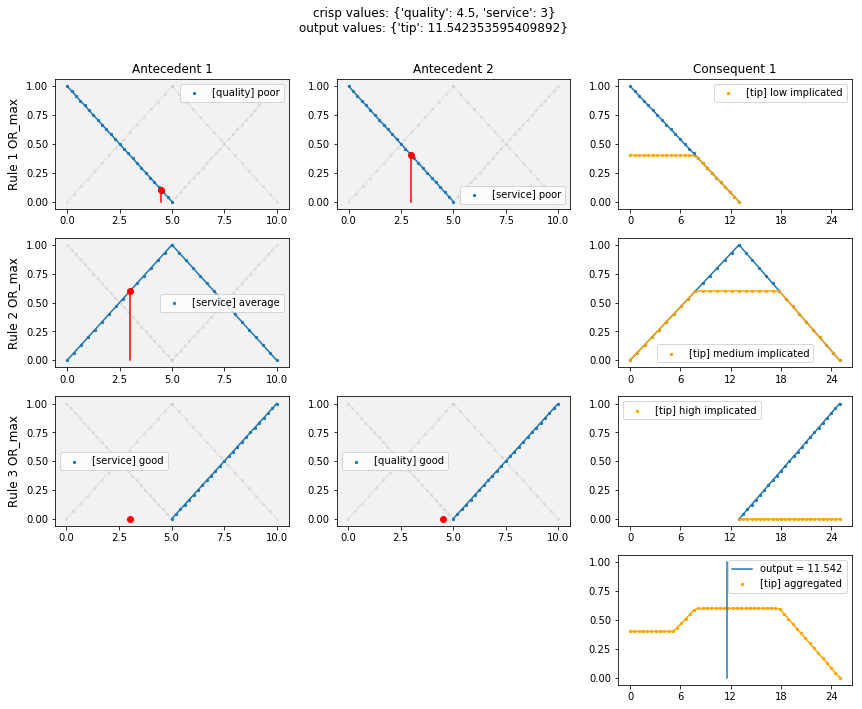

In [3]:
from collections import defaultdict
from copy import deepcopy
from typing import Dict, List, Callable, Tuple

from fuzzy_systems.core.membership_functions.free_shape_mf import FreeShapeMF
from fuzzy_systems.core.rules.fuzzy_rule_element import Antecedent, Consequent

# Step 1: define the linguistic variables
lv_quality = LinguisticVariable(name="quality", ling_values_dict={
    "poor": LinPWMF([0, 1], [5, 0]),
    "average": LinPWMF([0, 0], [5, 1], [10, 0]),
    "good": LinPWMF([5, 0], [10, 1])
})

lv_service = LinguisticVariable(name="service", ling_values_dict={
    "poor": LinPWMF([0, 1], [5, 0]),
    "average": LinPWMF([0, 0], [5, 1], [10, 0]),
    "good": LinPWMF([5, 0], [10, 1])
})

lv_tip = LinguisticVariable(name="tip", ling_values_dict={
    "low": LinPWMF([0, 1], [13, 0]),
    "medium": LinPWMF([0, 0], [13, 1], [25, 0]),
    "high": LinPWMF([13, 0], [25, 1])
})

# Step 2: use the linguistic variables to create fuzzy rules




r1 = FuzzyRule(
    ants=[
        Antecedent(lv_quality, "poor"),
        Antecedent(lv_service, "poor")
    ],
        ant_act_func=OR_max,
    cons=[
        Consequent(lv_tip, "low"),
    ],
    # implication function or "how the activated antecedents value will be combined with the consequent(s)
    impl_func=MIN
    
)

r2 = FuzzyRule(
    ants=[
        Antecedent(lv_service, "average"),
    ],
    # note: for this rule we still use the OR_max fuzzy operator but we can use another one like AND_min
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tip, "medium"),
    ],
    impl_func=MIN
)

r3 = FuzzyRule(
    ants=[
        Antecedent(lv_service, "good"),
        Antecedent(lv_quality, "good")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tip, "high"),
    ],
    impl_func=MIN
)

# Step 3: create the FIS
fis = FIS(
    rules=[r1, r2, r3],
    aggr_func=np.max, # aggregation function or "how the implicated consequent(s) will be combined together"
    defuzz_func=COA_func # defuzzification or "how the "final" membership function created after the aggregation step will be interpreted as a output crisp value
)

# Step 4: execute the FIS 
input_values = {'quality': 4.5, 'service': 3}
predicted_value = fis.predict(input_values)
print("predicted_value", predicted_value)


# Step 5: View the FIS
fisv = FISViewer(fis, figsize=(12, 10))
fisv.show()

In [4]:
# input_values = {'quality': 4.5, 'service': 3}
# for (a,b) in input_values.items():
#     print (a,b)

**TODO student**

* Explain how to bypass the library's limitation of using only one fuzzy operator per rule. In other words, how can you transform the following rule to be valid in this library: v1 is LOW AND (v2 is LOW OR v3 is HIGH) ?
* Using the linguistic variables you implemented in `020_linguistic_values` (copy paste your code or create a python module for it) of the tourist problem, reproduce the FIS shown in the next figure
   * Use the linguistic variables from `020_linguistic_values`
   * Create the fuzzy rules
   * Build the FIS
   * Show the FIS

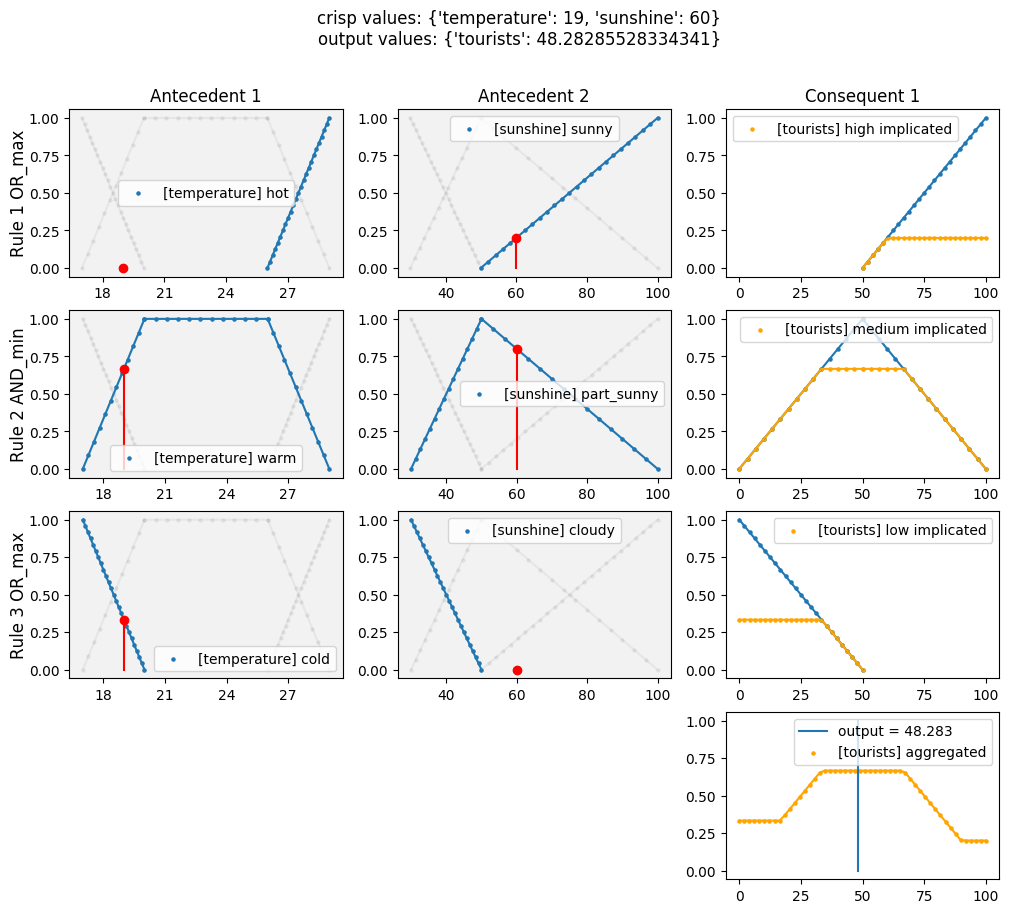

**TODO student**

* What is the output of "tourist" when:
  1. temperature = 0, sunshine = 0 ? 
  1. temperature = -10, sunshine = 77 ?
  1. temperature = 15, sunshine = 45 ?
  1. temperature = 25, sunshine = 20 ?
* Copy and paste this FIS and modify it to a Singleton FIS. Use the provided classes to do it. Don't reimplement a SingletonFIS


-----------------

# Exercice - please answer below

**TODO student**

* Explain how to bypass the library's limitation of using only one fuzzy operator per rule. In other words, how can you transform the following rule to be valid in this library: v1 is LOW AND (v2 is LOW OR v3 is HIGH) ?
* Using the linguistic variables you implemented in `020_linguistic_values` (copy paste your code or create a python module for it) of the tourist problem, reproduce the FIS shown in the next figure
   * Use the linguistic variables from `020_linguistic_values`
   * Create the fuzzy rules
   * Build the FIS
   * Show the FIS

* To bypass the library's limitation of using only one fuzzy operator per rule, we can transform one rule into many rules and use the convinient aggregation function to combine them. For instance, `v1 is LOW AND (v2 is LOW OR v3 is HIGH)` rule can be split into `v1 is LOW AND v2 is LOW` and `v1 is LOW AND v3 is HIGH` with the `OR` aggregation function.

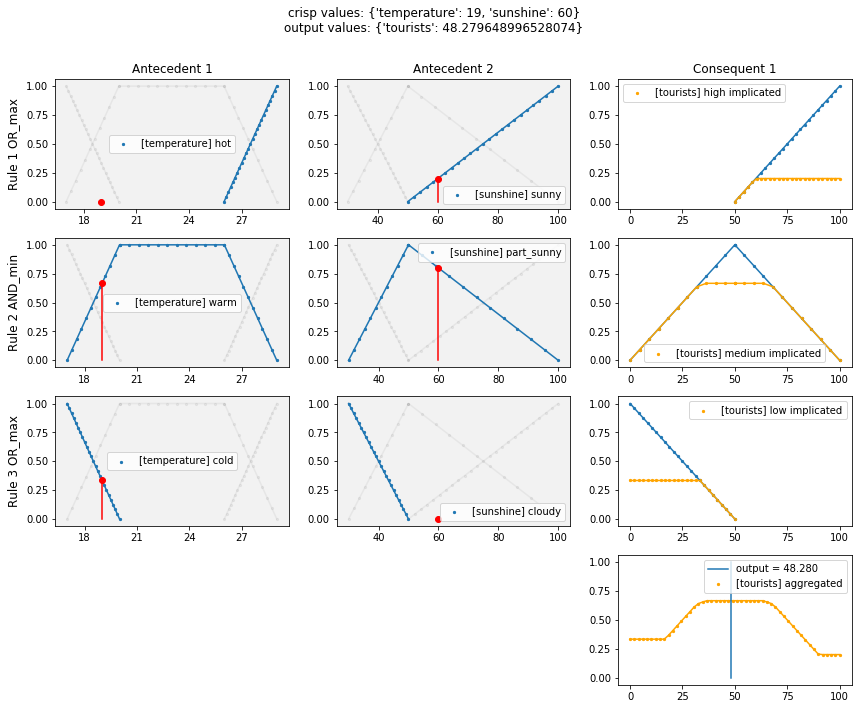

In [7]:
from collections import defaultdict
from copy import deepcopy
from typing import Dict, List, Callable, Tuple

from fuzzy_systems.core.membership_functions.free_shape_mf import FreeShapeMF
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF
from fuzzy_systems.core.rules.fuzzy_rule_element import Antecedent, Consequent
from fuzzy_systems.core.fis.fis import FIS, OR_max, AND_min, MIN, COA_func

# Step 1: define the linguistic variables
lv_temperature = LinguisticVariable(name="temperature", ling_values_dict={
    "cold": LinPWMF([17, 1], [20, 0]),
    "warm": TrapMF(17, 20, 26, 29),
    "hot": LinPWMF([26, 0], [29, 1])
})

lv_sunshine = LinguisticVariable(name="sunshine", ling_values_dict={
    "cloudy": LinPWMF([30, 1], [50, 0]),
    "part_sunny": TrapMF(30, 50, 100),
    "sunny": LinPWMF([50, 0], [100, 1])
})

lv_tourists = LinguisticVariable(name="tourists", ling_values_dict={
    "low": LinPWMF([0, 1], [50, 0]),
    "medium": TrapMF(0, 50, 100),
    "high": LinPWMF([50, 0], [100, 1])
})

# Step 2: use the linguistic variables to create fuzzy rules

# rule 1: IF "Temperature" is "hot" OR "Sunshine" is "sunny" THEN "Tourists" is "HIGH"   
# rule 2: IF "Temperature" is "warm" AND "Sunshine" is "part_sunny" THEN "Tourists" is "MEDIUM"    
# rule 3: IF "Temperature" is "cold" OR "Sunshine" is "cloudy" THEN "Tourists" is "LOW" 
r1 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "hot"),
        Antecedent(lv_sunshine, "sunny")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tourists, "high")
    ],
    impl_func=MIN
)

r2 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "warm"),
        Antecedent(lv_sunshine, "part_sunny")
    ],
    ant_act_func=AND_min,
    cons=[
        Consequent(lv_tourists, "medium")
    ],
    impl_func=MIN
)

r3 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "cold"),
        Antecedent(lv_sunshine, "cloudy")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tourists, "low")
    ],
    impl_func=MIN
)

# Step 3: create the FIS
fis = FIS(
    rules=[r1, r2, r3],
    aggr_func=np.max, # aggregation function or "how the implicated consequent(s) will be combined together"
    defuzz_func=COA_func # defuzzification or "how the "final" membership function created after the aggregation step will be interpreted as a output crisp value
)

# Step 4: execute the FIS 
input_values = {'temperature': 19, 'sunshine':60}
predicted_value = fis.predict(input_values)

# Step 5: View the FIS
fisv = FISViewer(fis, figsize=(12, 10))
fisv.show()



**TODO student**

* What is the output of "tourist" when:
  1. temperature = 0, sunshine = 0 ? 
  1. temperature = -10, sunshine = 77 ?
  1. temperature = 15, sunshine = 45 ?
  1. temperature = 25, sunshine = 20 ?
* Copy and paste this FIS and modify it to a Singleton FIS. Use the provided classes to do it. Don't reimplement a SingletonFIS

/Users/Sashok/Documents/2018-2019/S6/LFA/labs/LFA-lab3/fuzzy_systems/core/fis/singleton_fis.py:70: RuntimeWarning: invalid value encountered in double_scalars
  in_values=[numerator / float(denominator)], mf_values=[1])


{'temperature': 0, 'sunshine': 0} : {'tourists': nan}
{'temperature': -10, 'sunshine': 77} : {'tourists': nan}
{'temperature': 15, 'sunshine': 45} : {'tourists': nan}
{'temperature': 25, 'sunshine': 20} : {'tourists': nan}


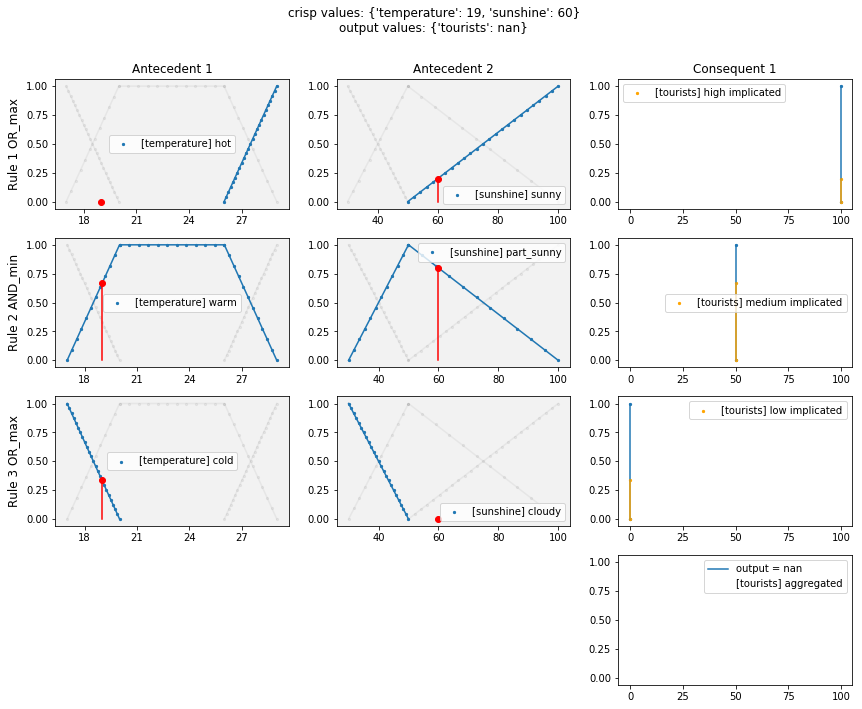

In [17]:
from fuzzy_systems.core.membership_functions.singleton_mf import SingletonMF

input_values_list = [
    {'temperature': 0, 'sunshine': 0}, 
    {'temperature': -10, 'sunshine': 77},
    {'temperature': 15, 'sunshine': 45},
    {'temperature': 25, 'sunshine': 20}
]

for input_values in input_values_list:
    predicted_value = fis.predict(input_values)
    print(input_values, ":", predicted_value)
    

lv_tourists = LinguisticVariable(name="tourists", ling_values_dict={
    "low": SingletonMF(0),
    "medium": SingletonMF(50),
    "high": SingletonMF(100)
})

r1 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "hot"),
        Antecedent(lv_sunshine, "sunny")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tourists, "high")
    ],
    impl_func=MIN
)

r2 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "warm"),
        Antecedent(lv_sunshine, "part_sunny")
    ],
    ant_act_func=AND_min,
    cons=[
        Consequent(lv_tourists, "medium")
    ],
    impl_func=MIN
)

r3 = FuzzyRule(
    ants=[
        Antecedent(lv_temperature, "cold"),
        Antecedent(lv_sunshine, "cloudy")
    ],
    ant_act_func=OR_max,
    cons=[
        Consequent(lv_tourists, "low")
    ],
    impl_func=MIN
)

fis = SingletonFIS(
    rules=[r1, r2, r3]
)

input_values = {'temperature': 19, 'sunshine':60}
predicted_value = fis.predict(input_values)

fisv = FISViewer(fis, figsize=(12, 10))
fisv.show()



### To submit

* Please make a zip called `lfa_labXX_YY.zip` where `XX` is the lab number and `YY` is your familly name. For example: `lfa_lab02_smith.zip`. 
* The mail's subject is `[LFA] rendu labXX` where `XX` is the lab number

The zip must contain all _needed_ the files to run this notebook. That is, don't send your virtualenv (only the requirements.txt). **If any additional steps are required to run your notebook(s)/code, please add a README.md where you indicate all the needed steps to reproduce your work.**

Note: Your notebooks must run completely even after the Jupyter kernel has been restarted. To ensure it will be the case when your lab will be reviewed, please select in the top menu "Kernel -> Restart and Run all" and check that the output of each cell is the desired output you want to submit.